# Logistic Regression

Today we will start working on our second Machine Learning model: Logistic Regression.

# Table of contents
[1. Logistic Regression](#1.-Linear-Regression)
- [1.1 Using logistic regression for child's low birth weight using father's engagement as predictor](#1.1-Using-logistic-regression-for-child's-low-birth-weight-using-father's-engagement-as-predictor)
- [1.2 Plotting the data](#1.2-Plotting-the-data)
- [1.3 Splitting data into train and test sets](#1.3-Splitting-data-into-train-and-test-sets)
- [1.4 Running the logistic regression algorithm](#1.4-Running-the-logistic-regression-algorithm)
- [1.5 Evaluating the logistic regression model](#1.5-Evaluating-the-logistic-regression-model)


[2. Multiple Logistic Regression](#2.-Multiple-Linear-Regression)
- [2.1 Multiple logistic regression for child's low birth weight using multiple features on father's engagement as predictors](#2.1-Multiple-logistic-regression-for-child's-low-birth-weight-using-multiple-features-on-father's-engagement-as-predictors)
- [2.2 Plotting the data](#2.2-Plotting-the-data)
- [2.3 Splitting data into train and test sets](#2.3-Splitting-data-into-train-and-test-sets)
- [2.4 Running the multiple logistic regression algorithm](#2.4-Running-the-multiple-logistic-regression-algorithm)
- [2.5 Evaluation and generalization](#2.5-Evaluation-and-generalization)



# 1. Logistic Regression

Logistic regression models the relationship between a binary outcome $Y$ that can be either 1 or 0 and a predictor $X$. The main difference between logistic regression and linear and multiple linear regression is that the resulting model is not linear (it is not a line but a curve) and that it does not predict the value of the outcome $Y$ but instead it predicts the probability that $Y$ is equal to 1.

As in linear regression, we plot the data on a scatter plot and then compute the best-fit curve through the data points using the following equation which takes into account that $Y$ is a binary variable:

$$ \frac{p(Y)}{1-p(Y)} = c_0 + c_1 X + \epsilon$$

where $p(Y)$ is the probability that $Y=1, $$c_0$ is the regression coefficient associated with the probability that $Y=1$ when $X=0$, and $c_1$ is the regression coefficient that tells us how much the probability that $Y=1$ changes when the predictor $X$ is not zero. As before, we will set $\epsilon$ to zero, meaning we will ignore the effects of noise.

The best-fit curve provides a nonlinear model which allows us to make predictions about the probability that $Y=1$ or $Y=0$ given the value of $X$.

In this section we will build a logistic regression model to predict layoff. For the predictor $X$, we will use information about whether the mother had "done regular work for pay last week" in wave 5 (when the child was ~9 years old) (feature m5i4).

In [1]:
# First, we load the libraries we will need for this notebook
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
import sys
import sklearn # this library provides functions for performing machine learning on data
import ff_functions as fff # this is the library we are providing for you to perform common operations on data

In [2]:
# We read in the Fragile Families data as in previous notebooks
background = "../../ai4all_data/background.csv"
data_frame = pd.read_csv(background, low_memory=False)
# We set the index of the DataFrame to match the challengeID
data_frame = data_frame.set_index('challengeID')

# 1.1 Using logistic regression for child's low birth weight using father's engagement as predictor

In this section we will build a logistic regression model to predict child's low birth weight. As a predictor, we will use an engineered feature, which we constructed on day 3, following a paper published in March 2018: "Father Early Engagement Behaviors and Infant Low Birth Weight" by Lee et al.

The paper combined the following three features into a single "father involvement" variable.

* "f1b16": During the baby mother's preg, did you give her money or buy things for the baby/ies?
* "f1b17": Did you help in other ways, like providing transportation / doing chores?
* "f1a2": Were you present at the birth?

They then used the engineered feature to predict the following **binary** variable:
* "cm1lbw": Constructed variable - Low Birth Weight


### Discuss with your partner:
TODO: fill in

### Subselecting variables

In [3]:
# Pick mother's age (cm1age), father's age (cf1age), and father reported income (f211)
baby_weight = fff.pick_ff_variables(data_frame, ["f1b16", "f1b17", "f1a2", "cm1lbw"], 
                                   remove_nans=True, remove_negatives=True)

# Let's change the names of the columns so it's easier for us to work with the data
baby_weight.columns = ["gave_money", "other_help", "present_at_birth", "low_birth_weight"]

baby_weight.head()

Data frame with  2267  rows and  4 columns.


,gave_money,other_help,present_at_birth,low_birth_weight
challengeID,,,,
2,1,1,2,0
4,1,1,1,0
5,1,2,2,0
7,1,1,1,0
8,1,1,1,0


In [4]:
baby_weight.describe()

,gave_money,other_help,present_at_birth,low_birth_weight
count,2267.000000,2267.000000,2267.000000,2267.000000
mean,1.079400,1.097045,1.276136,0.114248
std,0.270422,0.296084,0.447183,0.318182
min,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,2.000000,0.000000
max,2.000000,2.000000,2.000000,1.000000


### TODO: make this into a problem

In [5]:
### Generating an engineered feature:
baby_weight["father_engagement"] = (baby_weight.gave_money + \
                                    baby_weight.other_help + \
                                    baby_weight.present_at_birth)/3
baby_weight.head()

,gave_money,other_help,present_at_birth,low_birth_weight,father_engagement
challengeID,,,,,
2,1,1,2,0,1.333333
4,1,1,1,0,1.000000
5,1,2,2,0,1.666667
7,1,1,1,0,1.000000
8,1,1,1,0,1.000000


### Discuss with your partner:
* Why would the combination of the three features be a better predictor than using the father's providing money only? What other weighings of the three variables would you consider and why?

### Answer:

# 1.2 Plotting the data
Let's plot the data using the scatterplot function we learned.

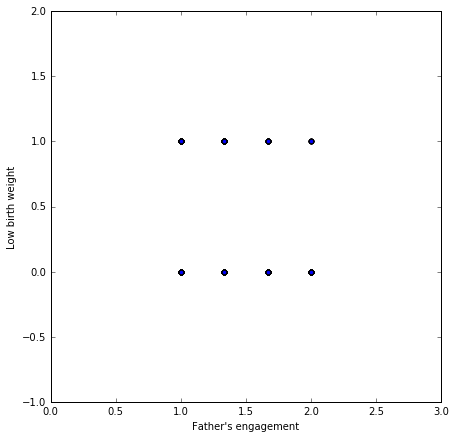

In [6]:
fff.scatterplot(baby_weight.father_engagement, \
                baby_weight.low_birth_weight, \
                xlabel = "Father's engagement", \
                ylabel = "Low birth weight")

TODO: discuss what it means. The students should notice that there are many points overlapping each other.

# 1.3 Splitting data into train and test sets

In [7]:
# First, let's split our data into train and test sets
from sklearn.cross_validation import train_test_split

X = baby_weight.father_engagement # predictor
y = baby_weight.low_birth_weight # outcome 
# The following line of code randomly splits both the outcome data and the predictor data into 
# a training and a testing set. The test_size argument is a number between 0 and 1 that tells the 
# function the percentage of data that should go into the test set.
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state=100)

print(baby_weight.shape)
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(2267, 5)
(1586,)
(681,)
(1586,)
(681,)


//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Convert the sets to numpy arrays

In [8]:
numpy_train_X = fff.pandas_to_2d_numpy(train_X)
numpy_train_y = fff.pandas_to_2d_numpy(train_y)

numpy_test_X = fff.pandas_to_2d_numpy(test_X)
numpy_test_y = fff.pandas_to_2d_numpy(test_y)

# 1.4 Running the logistic regression algorithm
**Let's do linear regression with `sklearn.linear_model.LogisticRegression`** You can learn about this function at 
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [9]:
from sklearn import linear_model

# intialize the model
log_reg = linear_model.LogisticRegression()

# fit the model ON THE TRAINING DATA
log_reg.fit(numpy_train_X, numpy_train_y)

# read the resulting model's slope and intercept values
slope = log_reg.coef_[0][0]
intercept = log_reg.intercept_[0]

# print the linear regression model coefficients
print('slope = {}'.format(slope))
print('y-intercept = {}'.format(intercept))

slope = 0.7590864384726821
y-intercept = -2.924983162834194


//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Plot the result

In [10]:
def scatterplot_with_curve(xdata, ydata, model, reg, xlabel="", ylabel="", title=""):
    fig = plt.figure(figsize=(7,5))
    plt.scatter(xdata, ydata)
    x = np.linspace(min(xdata)-5,max(xdata)+5, 100)
    loss = model(x * reg.coef_ + reg.intercept_)
    plt.plot(x, loss.ravel(), color='red', linewidth=3)
    plt.xlim(min(xdata)-5,max(xdata)+5)
    plt.ylim(min(ydata)-5,max(ydata)+5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

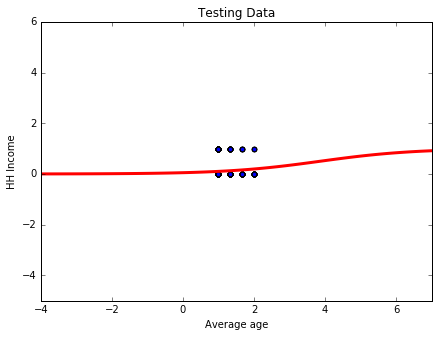

In [11]:
def model(x):
    return 1 / (1 + np.exp(-x))

#loss = model(linspace * reg.coef_ + reg.intercept_)
# Let's visualize how our model fits the testing data
scatterplot_with_curve(test_X, test_y, model, log_reg,
                          xlabel = "Average age", ylabel = "HH Income",\
                          title="Testing Data")

TODO: discuss why it looks like this (very heavily skewed towards 0, looks like it'll always predict 0?

# 1.5 Evaluating the logistic regression model
We will use the $R^2$ score to quantify the performance of our model. Note that we always test the performance of the model using the testing data set (not the training data set).

TODO: the difference isn't zero below!!

In [12]:
# First we use our model to predict the testing data. That is, we pass the average age of parents in the 
# testing set (x_test) and predict household income (y_pred).
pred_y = log_reg.predict(numpy_test_X)
# Note that we used the sklearn function predict. This function is simply using our model y = m*x + b and
# applying it to the test data:
pred_y2 = model(numpy_test_X * log_reg.coef_ + log_reg.intercept_)
print('Difference between predictions: {}'.format(sum(pred_y-pred_y2)) )

Difference between predictions: [-78.681584 -78.681584 -78.681584 -78.681584 -78.681584 -78.681584
 -78.681584 -78.681584 -78.681584 -78.681584 -78.681584 -78.681584
 -78.681584 -78.681584 -78.681584 -78.681584 -78.681584 -78.681584
 -78.681584 -78.681584 -78.681584 -78.681584 -78.681584 -78.681584
 -78.681584 -78.681584 -78.681584 -78.681584 -78.681584 -78.681584
 -78.681584 -78.681584 -78.681584 -78.681584 -78.681584 -78.681584
 -78.681584 -78.681584 -78.681584 -78.681584 -78.681584 -78.681584
 -78.681584 -78.681584 -78.681584 -78.681584 -78.681584 -78.681584
 -78.681584 -78.681584 -78.681584 -78.681584 -78.681584 -78.681584
 -78.681584 -78.681584 -78.681584 -78.681584 -78.681584 -78.681584
 -78.681584 -78.681584 -78.681584 -78.681584 -78.681584 -78.681584
 -78.681584 -78.681584 -78.681584 -78.681584 -78.681584 -78.681584
 -78.681584 -78.681584 -78.681584 -78.681584 -78.681584 -78.681584
 -78.681584 -78.681584 -78.681584 -78.681584 -78.681584 -78.681584
 -78.681584 -78.681584 -78.681

Now, we can quantify how good our model is at predicting new values by computing R2 score


In [13]:
R2 = sklearn.metrics.r2_score(numpy_test_y, pred_y)
print('mean root of square error : {}'.format(R2))

mean root of square error : -0.13122923588039836


TODO: explain what this means (negative value?)

Let's compare this to the algorithm's performance on the training data:

In [14]:
pred_train_y = log_reg.predict(numpy_train_X)
R2 = sklearn.metrics.r2_score(numpy_train_y, pred_train_y)
print('mean root of square error : {}'.format(R2))

mean root of square error : -0.12802275960170695


TODO: comment on this.

# 2. Multiple Logistic Regression

Multiple logistic regression models is the generalization of logistic regression to multiple predictors. That is, multiple logistic regression models the relationship between a binary outcome $Y$ that can be either 1 or 0 and multiple predictors $X_i$. 

The model is given by the equation

$$ \frac{p(Y)}{1-p(Y)} = c_0 + c_1 X_1 + c_2 X_2 + c_3 X_3 + \dots + c_n X_n + \epsilon$$

where $p(Y)$ is the probability that $Y=1, $$c_0$ is the regression coefficient associated with the probability that $Y=1$ when $X_i=0$ for all $i$, and $c_i$ is the regression coefficient that tells us how much the probability that $Y=1$ changes when the predictor $X_i$ is not zero. As before, we will set $\epsilon$ to zero, meaning we will ignore the effects of noise.

The best-fit curve provides a nonlinear model which allows us to make predictions about the probability that $Y=1$ or $Y=0$ given the values of $X_i$.

In this section we will build a multiple logistic regression model to predict eviction. For the predictor $X$ predictor, we will use SOMETHING (feature XXXXXXX) and SOMETHING2 (feature XXXX2).

# 2.1 Multiple logistic regression for child's low birth weight using multiple features on father's engagement as predictors
In this section we will build a multiple logistic regression model to predict the child's low birth weight. As a predictor, we will use two of the three features discussed above:

* "f1b16": During the baby mother's preg, did you give her money or buy things for the baby/ies?
* "f1b17": Did you help in other ways, like providing transportation / doing chores?

We will stick to two for now, so that we can easily visualize our data. Later, we can expand the number of features to include all 3 (and more!)



Let's remind ourselves what the data frame looks like:

In [15]:
baby_weight.head()

,gave_money,other_help,present_at_birth,low_birth_weight,father_engagement
challengeID,,,,,
2,1,1,2,0,1.333333
4,1,1,1,0,1.000000
5,1,2,2,0,1.666667
7,1,1,1,0,1.000000
8,1,1,1,0,1.000000


# 2.2 Plotting the data
We can visualize the mother's age, father's age and income in one 3D plot (which can also be found by calling **`fff.scatter_3d()`**). 

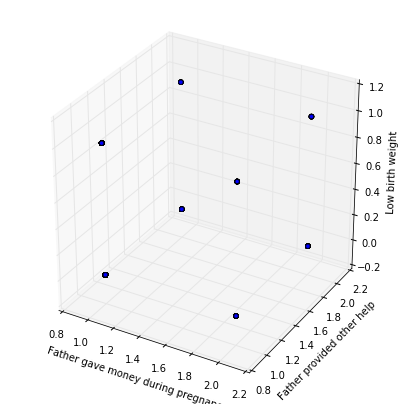

In [16]:
fff.scatter_3d(baby_weight.gave_money, baby_weight.other_help, baby_weight.low_birth_weight, xlabel="Father gave money during pregnancy", \
           ylabel="Father provided other help", zlabel = "Low birth weight")

TODO: discuss, why does the data look like this?

# 2.3 Splitting data into train and test sets
Let's again split our data into train and test sets, and try to find the best fit line.

In [17]:
# Split our data into train and test sets
from sklearn.cross_validation import train_test_split

X = baby_weight[["gave_money","other_help"]] # predictor
y = baby_weight[["low_birth_weight"]] # outcome 

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state=100)

print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(1586, 2)
(681, 2)
(1586, 1)
(681, 1)


In [18]:
numpy_train_X = fff.pandas_to_2d_numpy(train_X)
numpy_train_y = fff.pandas_to_2d_numpy(train_y)

numpy_test_X = fff.pandas_to_2d_numpy(test_X)
numpy_test_y = fff.pandas_to_2d_numpy(test_y)

# 2.4 Running the multiple logistic regression algorithm
In this section, we'll again use `sklearn.linear_model.LogisticRegression` to do multiple linear regression.

In [20]:
# fit the linear regression model and get the slope and intercept
multi_log_reg = linear_model.LinearRegression()
multi_log_reg.fit(numpy_train_X, numpy_train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

We denote $X_1$ and $X_2$ as two features `gave_money` and `other_help`. Then the multiple regression model can be written as 

$$ \frac{p(Y)}{1-p(Y)} = c_0 + c_1 X_1 + c_2 X_2$$

The coefficients can be retrieved from the fitted model.


In [22]:
# select slope and intercept values
slope = multi_log_reg.coef_[0]
intercbpt = multi_log_reg.intercept_[0]

# print the generated coefficients
print('[c1, c2] = {}'.format(slope))
print('c0 = {}'.format(intercept))

[c1, c2] = [ 0.08881726  0.00044284]
c0 = 0.017024096086889984


### Question 2.4.1
Which feature is more important in predicting the income?

### Answer:

TODO: Plot the 3D scatterplot with the slope and intercept (not sure how to plot the curve in 3d)

# 2.5 Evaluation and generalization

We can use this model to predict the low birth weight.

In [25]:
pred_y = multi_log_reg.predict(numpy_test_X)
# Note we could have also done the same thins using the model equation:
# pred_y = slope[0]*multi_numpy_test_X[:,0]+slope[1]*multi_numpy_test_X[:,1]+intercept

# calculate R2 score
R2 = sklearn.metrics.r2_score(numpy_test_y, pred_y)

print('Multiple regression results on TEST data')
print('R2 : {}'.format(R2))

Multiple regression results on TEST data
R2 : -0.0030562012484895984


TODO: explanation.
    
Now, as a sanity check, calculate mean square error ON THE TRAIN DATA.

In [28]:
pred_train_y = multi_log_reg.predict(numpy_train_X)
# Note we could have also done the same thins using the model equation:
# pred_y = slope[0]*multi_numpy_test_X[:,0]+slope[1]*multi_numpy_test_X[:,1]+intercept

# calculate R2 score
R2 = sklearn.metrics.r2_score(numpy_train_y, pred_train_y)

print('Multiple regression results on TRAIN data')
print('R2 : {}'.format(R2))

Multiple regression results on TRAIN data
R2 : 0.005841497248233463


TODO: add problems